<a href="https://colab.research.google.com/github/victorsobottka/bse-thesis-synthetic-data/blob/main/deepseek_syntheticdata_zeroshot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 Zero Shot Approach**

## **🗝️ Get Secrets**

Register on DeepSeek API to get an API Key.

In [40]:
from google.colab import userdata
DEEPSEEK_API_KEY = userdata.get('DEEPSEEK_API_KEY')

## **🐋 Calling DeepSeek API**

In [195]:
import requests

url = "https://api.deepseek.com/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {DEEPSEEK_API_KEY}",
    "Content-Type": "application/json"
}
data = {
    "model": "deepseek-chat",
    "messages": [
        {"role": "system", "content": "Eres un asistente útil."},
        {"role": "user", "content": "Generate synthetic data simulating the trend of NVIDIA's closing stock price over 100 trading days, starting from 2020-01-01.\n"

                                    "The initial closing price on 2020-01-01 is 5.7\n."
                                    "Exclude weekends (Saturdays and Sundays) from the generated dates.\n"
                                    "Incorporate realistic daily fluctuations to reflect stock market volatility.\n"
                                    "Output format: CSV with the following headers — Date,Close.\n"
                                    "Use the date format: YYYY-MM-DD.\n"
                                    }
    ],
    "temperature": 0.7
}

response = requests.post(url, headers=headers, json=data)
print(response.json())


{'id': '123c7aac-7160-4bbf-9eb3-e38fb0adbfb0', 'object': 'chat.completion', 'created': 1747149343, 'model': 'deepseek-chat', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': "Here's a synthetic dataset simulating NVIDIA's closing stock price over 100 trading days starting from 2020-01-01 with realistic daily fluctuations:\n\n```csv\nDate,Close\n2020-01-01,5.70\n2020-01-02,5.82\n2020-01-03,5.68\n2020-01-06,5.91\n2020-01-07,6.05\n2020-01-08,5.97\n2020-01-09,6.12\n2020-01-10,6.25\n2020-01-13,6.18\n2020-01-14,6.31\n2020-01-15,6.42\n2020-01-16,6.35\n2020-01-17,6.51\n2020-01-21,6.63\n2020-01-22,6.57\n2020-01-23,6.72\n2020-01-24,6.65\n2020-01-27,6.53\n2020-01-28,6.67\n2020-01-29,6.81\n2020-01-30,6.74\n2020-01-31,6.89\n2020-02-03,7.02\n2020-02-04,7.15\n2020-02-05,7.08\n2020-02-06,7.23\n2020-02-07,7.36\n2020-02-10,7.29\n2020-02-11,7.43\n2020-02-12,7.57\n2020-02-13,7.50\n2020-02-14,7.64\n2020-02-18,7.77\n2020-02-19,7.91\n2020-02-20,7.84\n2020-02-21,7.70\n2020-02-24,7.56\n2020

## **🛜 Getting the Response**

In [189]:
# Debugging response
if response.status_code == 200:
    result = response.json()
    answer = result['choices'][0]['message']['content']
    print(answer)
else:
    print(f"Error {response.status_code}:")
    print(response.text)


Here's a synthetic dataset simulating NVIDIA's closing stock price over 100 trading days starting from 2020-01-01 with realistic daily fluctuations. The data excludes weekends and includes market-like volatility with some upward momentum (reflecting typical tech stock behavior).

```csv
Date,Close
2020-01-01,5.70
2020-01-02,5.82
2020-01-03,5.91
2020-01-06,6.05
2020-01-07,5.97
2020-01-08,6.12
2020-01-09,6.25
2020-01-10,6.18
2020-01-13,6.30
2020-01-14,6.42
2020-01-15,6.35
2020-01-16,6.50
2020-01-17,6.63
2020-01-21,6.55
2020-01-22,6.70
2020-01-23,6.82
2020-01-24,6.75
2020-01-27,6.88
2020-01-28,6.95
2020-01-29,7.08
2020-01-30,7.20
2020-01-31,7.12
2020-02-03,7.25
2020-02-04,7.38
2020-02-05,7.50
2020-02-06,7.42
2020-02-07,7.55
2020-02-10,7.68
2020-02-11,7.60
2020-02-12,7.73
2020-02-13,7.85
2020-02-14,7.78
2020-02-18,7.90
2020-02-19,8.03
2020-02-20,8.15
2020-02-21,8.08
2020-02-24,8.20
2020-02-25,8.12
2020-02-26,8.25
2020-02-27,8.10
2020-02-28,7.95
2020-03-02,8.10
2020-03-03,8.25
2020-03-04,8.

## **📃Get CSV from the Response**

In [196]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

csv_text = ""

if response.status_code == 200:
    content = response.json()["choices"][0]["message"]["content"]
    # Extract the CSV content inside triple backticks ```csv ... ```
    match = re.search(r"```csv\s+(.*?)```", content, re.DOTALL)
    if match:
        csv_text = match.group(1).strip()
        # print(csv_text)

    else:
        print("CSV block not found.")
else:
    print(f"Error {response.status_code}:")
    print(response.text)


df_generated = pd.read_csv(StringIO(csv_text))
df_generated['Date'] = pd.to_datetime(df_generated['Date'])
df_generated

,Date,Close
0,2020-01-01,5.70
1,2020-01-02,5.82
2,2020-01-03,5.68
3,2020-01-06,5.91
4,2020-01-07,6.05
...,...,...
99,2020-05-22,11.15
100,2020-05-26,11.29
101,2020-05-27,11.43
102,2020-05-28,11.57


## **📉 Data Visualization**

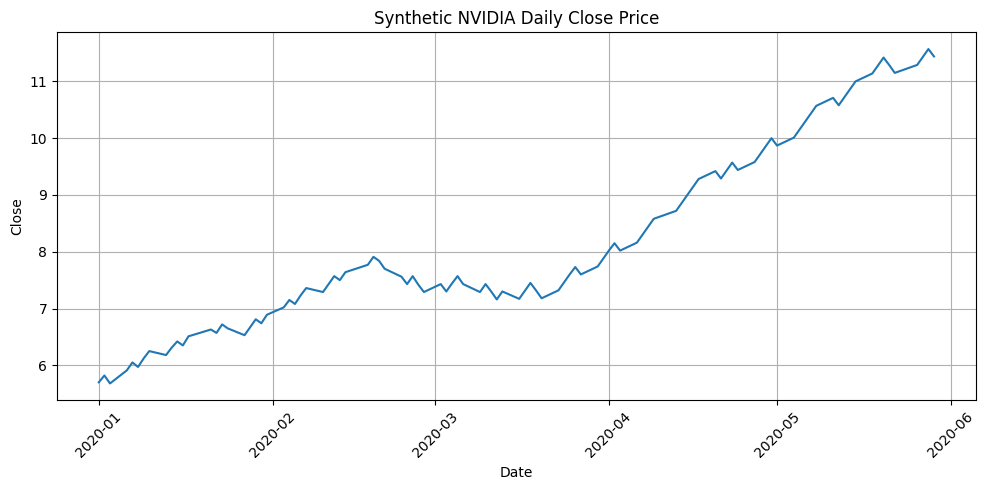

In [197]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_generated['Date'], df_generated['Close'])
plt.title("Synthetic NVIDIA Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🌍 Compare with real data**

### **💾 Connect to Google Drive**

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **🌍 Load Real Data**

In [198]:
import pandas as pd

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/thesis/nvidia_2020_2021.csv"
df_nvda = pd.read_csv(file_path, skiprows=[1, 2], header=0)
df_nvda.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]

number_of_rows = 100

# Display the first x rows
print(df_nvda.head(number_of_rows))

          Date  Open  High   Low  Close      Volume
0   2020-01-02  5.94  5.97  5.89   5.97   237536000
1   2020-01-03  5.85  5.92  5.83   5.88   205384000
2   2020-01-06  5.78  5.91  5.76   5.90   262636000
3   2020-01-07  5.93  6.02  5.88   5.97   314856000
4   2020-01-08  5.97  6.03  5.93   5.98   277108000
..         ...   ...   ...   ...    ...         ...
95  2020-05-19  8.76  9.05  8.73   8.77   717320000
96  2020-05-20  8.96  9.01  8.86   8.94   587536000
97  2020-05-21  9.02  9.02  8.71   8.74   761068000
98  2020-05-22  8.79  9.06  8.68   8.99  1038764000
99  2020-05-26  9.12  9.15  8.64   8.69   770780000

[100 rows x 6 columns]


In [199]:

df_real = df_nvda.head(number_of_rows)
df_real['Date'] = pd.to_datetime(df_real['Date'])
df_real = df_real[(df_real['Date'].dt.year == 2020)]
df_real = df_real.head(100)
df_real.head()


<ipython-input-199-f5fbad37a788>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['Date'] = pd.to_datetime(df_real['Date'])


,Date,Open,High,Low,Close,Volume
0,2020-01-02,5.94,5.97,5.89,5.97,237536000
1,2020-01-03,5.85,5.92,5.83,5.88,205384000
2,2020-01-06,5.78,5.91,5.76,5.90,262636000
3,2020-01-07,5.93,6.02,5.88,5.97,314856000
4,2020-01-08,5.97,6.03,5.93,5.98,277108000


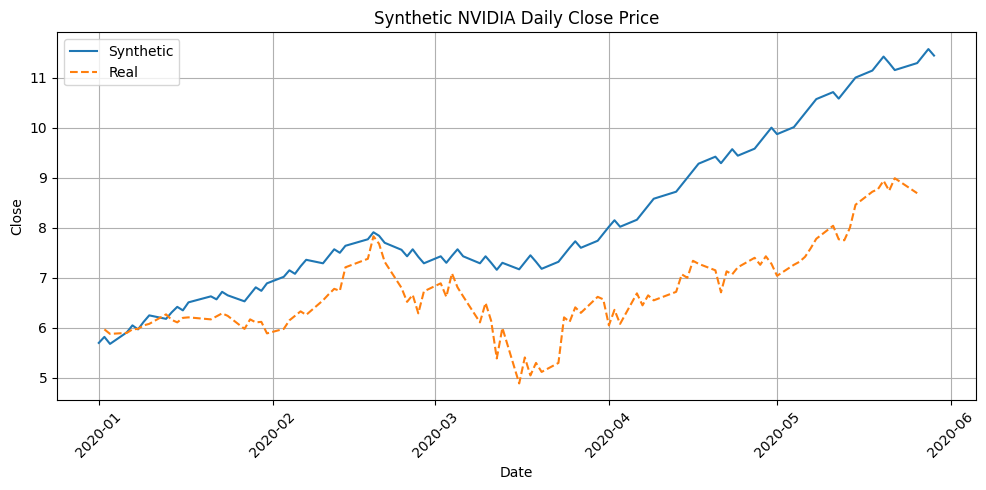

In [200]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_generated['Date'], df_generated['Close'], label='Synthetic')
plt.plot(df_real['Date'], df_real['Close'], linestyle="--", label='Real')
plt.title("Synthetic NVIDIA Daily Close Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Add legend
plt.legend()
plt.show()

